<a href="https://colab.research.google.com/github/HermesArteaga/Hurto_a_Personas_Colombia_2022/blob/main/Hurtos_en_Colombia_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hurtos en Colombia 2022**
##### El presente análisis de datos se apoya en los datos proporcionados por la Policia Nacional Colombiana. Se puede recurrir a los mismos en el siguiente enlace: 
https://www.policia.gov.co/grupo-informacion-criminalidad/estadistica-delictiva

##### Los datos aquí presentes hacen referencia a la cantidad de hurtos reportados diariamente a nivel nacional.

#### *Período del 01 de enero al 30 septiembre del 2022*

###**1 Configurando el ambiente de trabajo**

Se procede a realizar la configuración de nuestro entorno en la nube, para que se comporte como un entorno local de trabajo y se pueda manejar el sistema de archivos

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**2 Cargando Datos**

In [2]:
# Se importa las librerias que nos van a permitir la manipulación y análisis de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Se lee el archivo desde la ruta
df_base = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Hurtos en Colombia 2022/hurto_a_personas_2022.xlsx", skiprows=9)
df_base

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA_EDAD_PERSONA,CODIGO_DANE,CANTIDAD
0,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-01-15,MASCULINO,ADULTOS,91001000.0,1.0
1,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-23,FEMENINO,ADULTOS,91001000.0,1.0
2,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-23,MASCULINO,ADULTOS,91001000.0,1.0
3,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-26,MASCULINO,ADULTOS,91001000.0,1.0
4,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-03-13,FEMENINO,ADULTOS,91001000.0,1.0
...,...,...,...,...,...,...,...,...
73092,TOTAL,NaN,NaN,NaT,NaN,NaN,NaN,236653.0
73093,FUENTE: DIJIN-POLIC...,NaN,NaN,NaT,NaN,NaN,NaN,NaN
73094,*Agrupación referente a la clasificación del c...,NaN,NaN,NaT,NaN,NaN,NaN,NaN
73095,Elaborado: PT Deisy Santamaria,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [4]:
# Se cambia el formato del archivo de xlsx a csv, siendo un formato más adecuado para trabajar de una manera más fluida
df_base.to_csv("/content/drive/MyDrive/Colab Notebooks/Hurtos en Colombia 2022/hurto_a_personas_2022.csv", index = False)

In [5]:
# Se lee el archivo ya transformado a csv
df_original = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hurtos en Colombia 2022/hurto_a_personas_2022.csv")
df_original

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA_EDAD_PERSONA,CODIGO_DANE,CANTIDAD
0,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-01-15,MASCULINO,ADULTOS,91001000.0,1.0
1,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-23,FEMENINO,ADULTOS,91001000.0,1.0
2,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-23,MASCULINO,ADULTOS,91001000.0,1.0
3,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-26,MASCULINO,ADULTOS,91001000.0,1.0
4,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-03-13,FEMENINO,ADULTOS,91001000.0,1.0
...,...,...,...,...,...,...,...,...
73092,TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,236653.0
73093,FUENTE: DIJIN-POLIC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73094,*Agrupación referente a la clasificación del c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73095,Elaborado: PT Deisy Santamaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Se realiza una copia profunda para no alterar el data frame original
df = df_original.copy(deep=True)
df

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA_EDAD_PERSONA,CODIGO_DANE,CANTIDAD
0,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-01-15,MASCULINO,ADULTOS,91001000.0,1.0
1,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-23,FEMENINO,ADULTOS,91001000.0,1.0
2,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-23,MASCULINO,ADULTOS,91001000.0,1.0
3,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-26,MASCULINO,ADULTOS,91001000.0,1.0
4,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-03-13,FEMENINO,ADULTOS,91001000.0,1.0
...,...,...,...,...,...,...,...,...
73092,TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,236653.0
73093,FUENTE: DIJIN-POLIC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73094,*Agrupación referente a la clasificación del c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73095,Elaborado: PT Deisy Santamaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Se lee las últimas filas, observado que las ultimas 5 no tienen información de relevancia para el análisis
df.tail(10)

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA_EDAD_PERSONA,CODIGO_DANE,CANTIDAD
73087,NO REPORTADO,TOLIMA,MARIQUITA,2022-09-03,MASCULINO,ADULTOS,73443000.0,1.0
73088,NO REPORTADO,TOLIMA,MARIQUITA,2022-09-20,MASCULINO,ADULTOS,73443000.0,1.0
73089,NO REPORTADO,TOLIMA,PURIFICACIÓN,2022-06-27,FEMENINO,ADULTOS,73585000.0,1.0
73090,NO REPORTADO,VALLE,CALI (CT),2022-09-27,FEMENINO,ADULTOS,76001000.0,1.0
73091,NO REPORTADO,VALLE,CANDELARIA,2022-08-02,FEMENINO,ADULTOS,76130000.0,1.0
73092,TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,236653.0
73093,FUENTE: DIJIN-POLIC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73094,*Agrupación referente a la clasificación del c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73095,Elaborado: PT Deisy Santamaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73096,Revisado: IT Cesar Andres Marquez,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Se elimina las ultimas 5 columnas que no tienen relevancia y generan ruido en la exploración de la base de datos
df.drop(range(73092, 73097, 1), axis = 0, inplace = True)

In [9]:
# Se revisa que efectivamente se hayan eliminado las filas que queríamos
df.tail(10)

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA_EDAD_PERSONA,CODIGO_DANE,CANTIDAD
73082,NO REPORTADO,TOLIMA,FLANDES,2022-09-24,FEMENINO,ADULTOS,73275000.0,1.0
73083,NO REPORTADO,TOLIMA,GUAMO,2022-08-06,MASCULINO,ADULTOS,73319000.0,1.0
73084,NO REPORTADO,TOLIMA,GUAMO,2022-09-11,MASCULINO,ADULTOS,73319000.0,1.0
73085,NO REPORTADO,TOLIMA,HONDA,2022-07-19,FEMENINO,ADULTOS,73349000.0,1.0
73086,NO REPORTADO,TOLIMA,LÍBANO,2022-09-17,MASCULINO,ADULTOS,73411000.0,1.0
73087,NO REPORTADO,TOLIMA,MARIQUITA,2022-09-03,MASCULINO,ADULTOS,73443000.0,1.0
73088,NO REPORTADO,TOLIMA,MARIQUITA,2022-09-20,MASCULINO,ADULTOS,73443000.0,1.0
73089,NO REPORTADO,TOLIMA,PURIFICACIÓN,2022-06-27,FEMENINO,ADULTOS,73585000.0,1.0
73090,NO REPORTADO,VALLE,CALI (CT),2022-09-27,FEMENINO,ADULTOS,76001000.0,1.0
73091,NO REPORTADO,VALLE,CANDELARIA,2022-08-02,FEMENINO,ADULTOS,76130000.0,1.0


### **3 Exploración de los datos**

In [10]:
# Qué columnas tienen los datos?
df.columns

Index(['ARMAS_MEDIOS', 'DEPARTAMENTO ', 'MUNICIPIO ', 'FECHA ', 'GENERO',
       '*AGRUPA_EDAD_PERSONA', 'CODIGO_DANE', 'CANTIDAD '],
      dtype='object')

##### Al inspeccionar las columnas, nos ofrece una información de las variables que se relacionan al momento de reportar un hurto, en las cuales se clasifican por departamento, municipio, código proporcionado por el DANE para clasificar al municipio, las armas o tipo de modalidad que se utilizó para cometer el delito, el género de la persona asaltada, edad de la persona quién fue la víctima, la fecha diaria y cantidad de hurtos.

In [11]:
# Qué tamaño tienen los datos
df.shape

(73092, 8)

In [12]:
# Resumen de los datos con los que cuenta el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73092 entries, 0 to 73091
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ARMAS_MEDIOS          73092 non-null  object 
 1   DEPARTAMENTO          73092 non-null  object 
 2   MUNICIPIO             73092 non-null  object 
 3   FECHA                 73092 non-null  object 
 4   GENERO                73092 non-null  object 
 5   *AGRUPA_EDAD_PERSONA  73092 non-null  object 
 6   CODIGO_DANE           73092 non-null  float64
 7   CANTIDAD              73092 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.0+ MB


In [13]:
# Transformación de la columna CODIGO_DANE a objeto ya que este no es numero con el cual necesitemos hacer operaciones numéricas##
df['CODIGO_DANE'] = df['CODIGO_DANE'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73092 entries, 0 to 73091
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ARMAS_MEDIOS          73092 non-null  object 
 1   DEPARTAMENTO          73092 non-null  object 
 2   MUNICIPIO             73092 non-null  object 
 3   FECHA                 73092 non-null  object 
 4   GENERO                73092 non-null  object 
 5   *AGRUPA_EDAD_PERSONA  73092 non-null  object 
 6   CODIGO_DANE           73092 non-null  object 
 7   CANTIDAD              73092 non-null  float64
dtypes: float64(1), object(7)
memory usage: 5.0+ MB


In [14]:
# Cómo se distribuyen las variables númericas
df.describe()

,CANTIDAD
count,73092.000000
mean,3.237741
std,9.801537
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,203.000000


In [15]:
# Cómo se describen las variables categóricas
df.describe(include=["O"])

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA_EDAD_PERSONA,CODIGO_DANE
count,73092,73092,73092,73092,73092,73092,73092.0
unique,9,32,921,273,3,4,988.0
top,SIN EMPLEO DE ARMAS,CUNDINAMARCA,BOGOTÁ D.C. (CT),2022-08-14,MASCULINO,ADULTOS,11001000.0
freq,32309,12806,3791,349,42211,70157,3791.0


### **3.1 Procesamiento de datos**

In [16]:
# Del análisis anterior se determinar que la columna CODIGO_DANE es innecesaria
df.drop(["CODIGO_DANE"], axis = 1, inplace = True)

In [17]:
# Se cambia el tipo de dato de la columna fecha a un formato datetime para trabajar con series de tiempo
df["FECHA"] = pd.to_datetime(df["FECHA "]) 
df.head(5)

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA_EDAD_PERSONA,CANTIDAD,FECHA
0,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-01-15,MASCULINO,ADULTOS,1.0,2022-01-15
1,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-23,FEMENINO,ADULTOS,1.0,2022-02-23
2,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-23,MASCULINO,ADULTOS,1.0,2022-02-23
3,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-02-26,MASCULINO,ADULTOS,1.0,2022-02-26
4,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-03-13,FEMENINO,ADULTOS,1.0,2022-03-13


In [18]:
# Se renombra la columna CANTIDAD, DEPARTAMENTO y MUNICIPIO, ya que tiene un espacio en blanco y generará problemas a futuro
df.rename(columns={"CANTIDAD ": "CANTIDAD"}, inplace=True)
df.rename(columns={"DEPARTAMENTO ": "DEPARTAMENTO"}, inplace=True)
df.rename(columns={"MUNICIPIO ": "MUNICIPIO"}, inplace=True)

### **3.2 EDA (Análisis exploratorio de datos)**

In [19]:
# Se agrupa por departamento y se suma la cantidad de hurtos por cada departamento.
df.groupby(["DEPARTAMENTO"])["CANTIDAD"].sum().to_frame().sort_values("CANTIDAD", ascending = False)

,CANTIDAD
DEPARTAMENTO,
CUNDINAMARCA,104751.0
ANTIOQUIA,29072.0
VALLE,21465.0
ATLÁNTICO,13876.0
SANTANDER,9052.0
TOLIMA,5544.0
BOLÍVAR,5255.0
NARIÑO,5092.0
HUILA,4964.0


In [20]:
# Se agrupa por municipio y se suma la cantidad de hurtos por cada municipio.
df.groupby(["MUNICIPIO"])["CANTIDAD"].sum().to_frame().sort_values("CANTIDAD", ascending = False)

,CANTIDAD
MUNICIPIO,
BOGOTÁ D.C. (CT),89082.0
MEDELLÍN (CT),19883.0
CALI (CT),16054.0
BARRANQUILLA (CT),9862.0
SOACHA,5862.0
...,...
CABRERA,1.0
PULÍ,1.0
CÉRTEGUI,1.0


##### Aquí se organizó los datos de manera descendente, para poder corroborar en qué Departamento del país se presentan más robos, se recurrió a una sumatoria, debido a que un solo reporte equivale en ocasiones a varios hurtos, es decir que una persona puede reportar múltiples hurtos cometidos. En este caso Cundinamarca es el departamento que más hurtos presento con 104.751, seguido de Antioquia con 29.072 y Valle con 21.465. El departamento con menos hurtos es Vaupés con 14 hurtos reportados hasta el 30 de septiembre de 2022. Cabe resaltar que los hurtos cometidos corresponden a una correlación positiva entre el tamaño del departamento y el número de hurtos reportados. Si se realiza una desagregación por municipios se tiene que las capitales de los principales departamentos son las que presentan mayor número de hurtos, por otra parte, los municipios de 6ta categoría (municipios con población igual o inferior a diez mil) tienen índices de hurtos muy bajos.

### **4 Graficos**

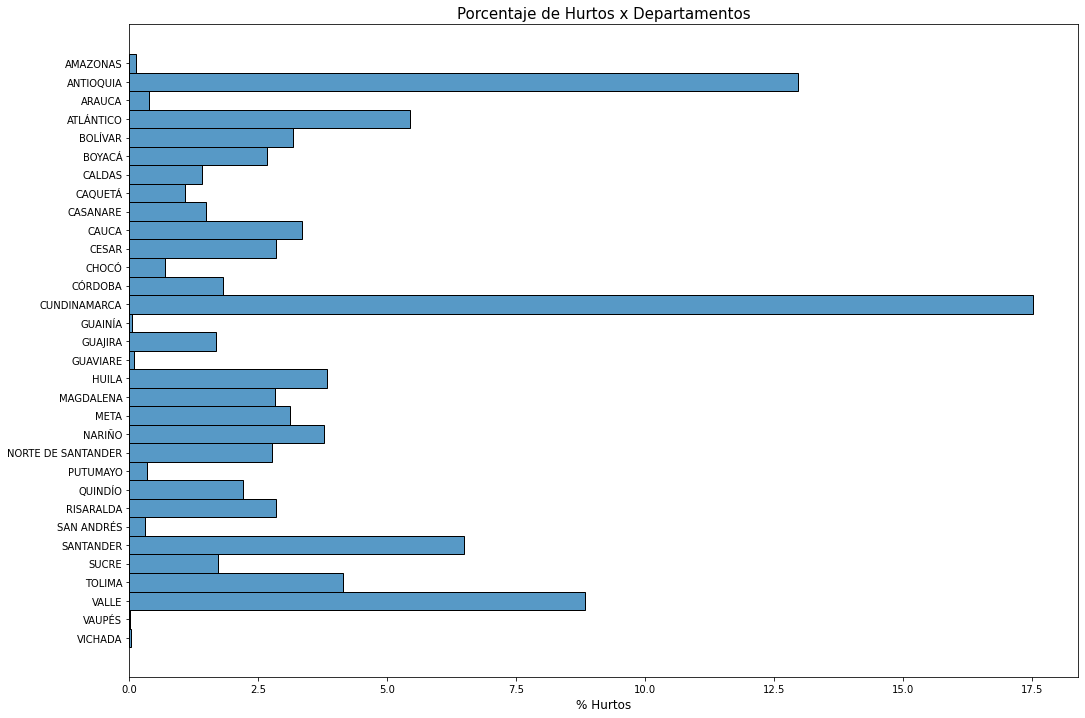

In [21]:
# Porcentaje de hurtos por departamento 
plt.figure(figsize=(17, 12))
sns.histplot(data = df, y = "DEPARTAMENTO", stat = "percent" )
plt.title("Porcentaje de Hurtos x Departamentos", fontsize = 15)
plt.ylabel("")
plt.xlabel("% Hurtos", fontsize = 12)
plt.xticks(rotation = "horizontal")
plt.show()

##### AL analizar los datos en base a porcentajes de participación de los totales, se observa que Cundinamarca aporta el 17.5% de los hurtos, seguido de Antioquia con el 13%, Valle del Cauca con el 7.5% y Santander alrededor del 6%.

In [22]:
# Se realiza una transformación a porcentajes en la columna GENERO
df["GENERO"].value_counts() / df["GENERO"].value_counts().sum() * 100 

MASCULINO        57.750506
FEMENINO         42.238549
NO REPORTADO      0.010945
Name: GENERO, dtype: float64

##### Al analizar los porcentajes de la categoría de género, se tiene que el 57.75% de los delitos reportados fueron cometidos hacia personas de género masculino; el 42.23% fueron cometidos hacia personas del género femenino; y el restante 0.010% no se especifica el género.

In [23]:
# Cantidad de víctimas agrupadas por GENERO y EDAD
df.groupby(["GENERO", "*AGRUPA_EDAD_PERSONA"])["CANTIDAD"].sum().to_frame()

CANTIDAD
GENERO        *AGRUPA_EDAD_PERSONA          
FEMENINO      ADOLESCENTES             996.0
              ADULTOS                94860.0
              MENORES                  163.0
MASCULINO     ADOLESCENTES            1924.0
              ADULTOS               138484.0
              MENORES                  217.0
NO REPORTADO  NO REPORTADO               9.0

##### La mayoría de los delitos de hurto cometidos, agrupados en edad categórica, fueron perpetrados hacia adultos en los dos géneros, seguido de los adolescentes y una pequeña proporción hacia menores. En todos los casos hay una mayor proporción de delitos cometidos hacia personas de género masculino.

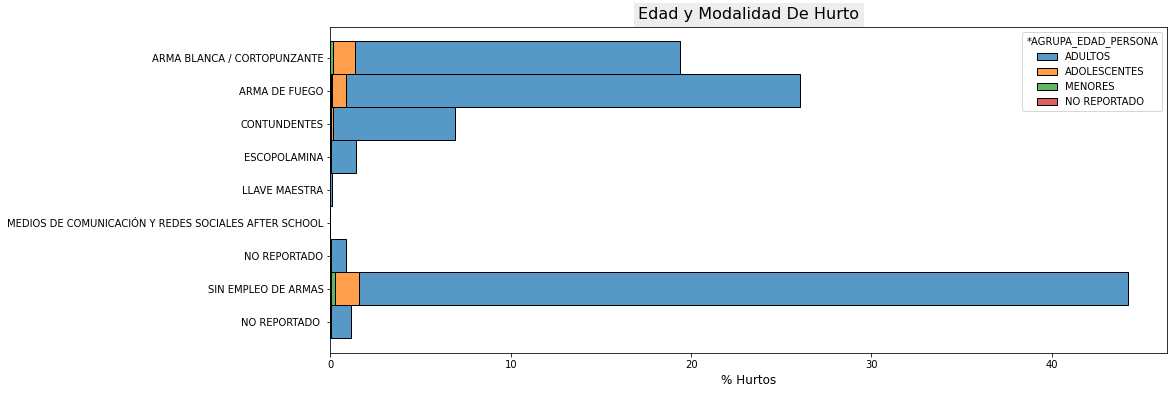

In [24]:
# Histograma EDAD y ARMAS_MEDIOS
plt.figure(figsize=(15, 6))
sns.histplot(data = df, y = "ARMAS_MEDIOS", hue = "*AGRUPA_EDAD_PERSONA", multiple = "stack",stat = "percent")
plt.title("Edad y Modalidad De Hurto", fontsize = 16, backgroundcolor = "#ebedef", pad='8.0')
plt.ylabel("")
plt.xlabel("% Hurtos", fontsize = 12)
plt.xticks(rotation = "horizontal")
plt.show()

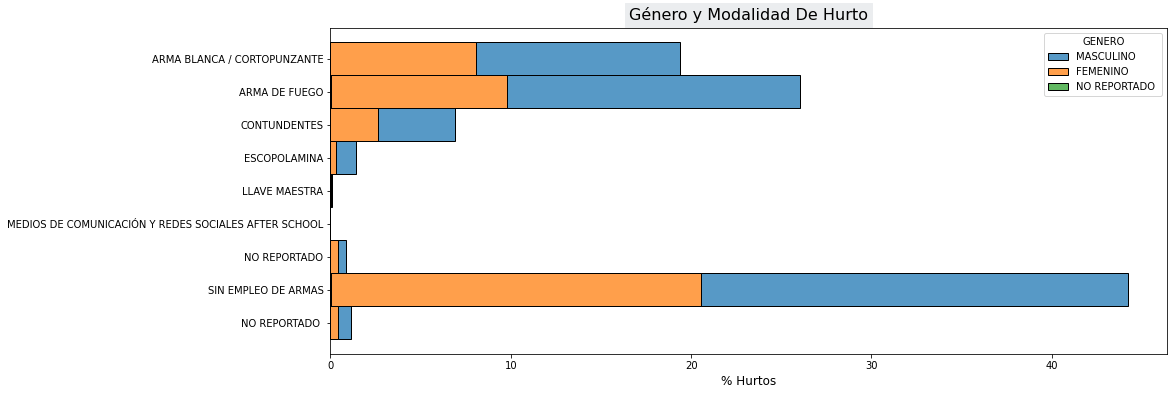

In [25]:
# Histograma GENERO y ARMAS_MEDIOS
plt.figure(figsize=(15, 6))
sns.histplot(data = df, y = "ARMAS_MEDIOS", hue = "GENERO", binwidth = 0.5, multiple = "stack", stat = "percent")
plt.title("Género y Modalidad De Hurto", fontsize = 16, backgroundcolor = "#ebedef", pad='8.0')
plt.ylabel("")
plt.xlabel("% Hurtos", fontsize = 12)
plt.show()

##### Al cruzar las categorías de **género y la modalidad de hurto** que fue empleada, se encuentra que el **medio de hurto más utilizado es sin empleo de armas**, representando alrededor del 45%, en el cual se encuentran submodalidades como el "cosquilleo", "raponaso", "abandono de pertenencias", etc. Por otra parte, se encuentra seguido de la **modalidad arma de fuego** una forma muy violenta de robo, representando el **27%**; la modalidad por arma corto punzante representa el 20% de los hurtos totales; el uso de artefactos contundentes el 6% y una forma de hurto popular en Colombia que es el uso de escopolamina se encuentra alrededor del 2%.
##### En todos los casos de **hurtos presentados**, la mayor proporción según la modalidad se atribuye al **género masculino como víctima**, a excepción de la modalidad que no emplea armas, en la cual la proporción entre hombres y mujeres es similar.
##### Un análisis muy importante que se desprende y de caracter preocupante cuando se comparan las **formas de hurto violentas**, frente a las no violentas, es que, si sumamos la proporción de armas de fuego, armas corto punzantes, artefactos contundentes y el uso de escopolamina, se encuentra que **representan más de la mitad** de los hurtos cometidos. Tiene especial atención este hecho debido a que **atentan directamente contra la vida e integridad de la persona**.


In [26]:
# Se define la serie temporal y se agrupá por mes con el fin de ver la cantidad de hechos mensuales
df_seriet = df.groupby(pd.Grouper(key = "FECHA", freq = "M"))[["CANTIDAD"]].sum()
df_seriet

,CANTIDAD
FECHA,
2022-01-31,23553.0
2022-02-28,24063.0
2022-03-31,29177.0
2022-04-30,26474.0
2022-05-31,25806.0
2022-06-30,23946.0
2022-07-31,24177.0
2022-08-31,29241.0
2022-09-30,30216.0


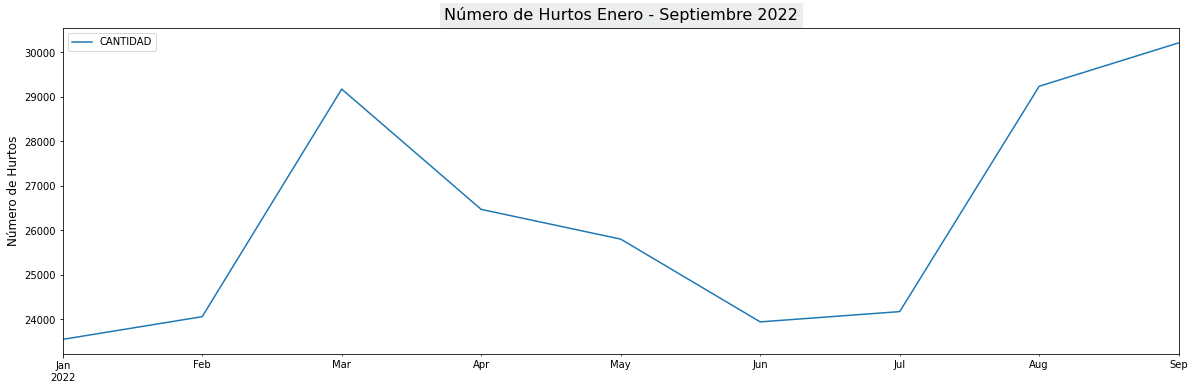

In [27]:
# Grafica serie de tiempo cantidad de hurtos por mes
df_seriet.plot(figsize=(20, 6))
plt.title("Número de Hurtos Enero - Septiembre 2022", fontsize = 16, backgroundcolor = "#ebedef", pad='8.0')
plt.ylabel("Número de Hurtos", fontsize = 12)
plt.xlabel("")
plt.show()

#### El 2022 fue uno de los años más inseguros percibidos por los colombianos y colombianas, presentándose en su mayoría delitos de hurto, al analizar la tendencia de la serie de tiempo a lo largo del año, se partió de una cifra de 23000 hurtos en enero, llegando hasta su pico más alto en septiembre. Tuvo una caída en el mes de junio y julio, sin embargo, comenzó su ascenso hasta septiembre mes en el cual las encuestas de seguridad ciudadana percibieron como el más inseguro en muchos años.